<a href="https://colab.research.google.com/github/yustinachang/1121_20009_Digital-Image-Processing-and-Analysis/blob/main/HW2/231006_MNIST%E8%B3%87%E6%96%99%E8%99%95%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Connect colab to googledrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls '/content/drive/MyDrive/Colab Notebooks'

1112_python通識  1121_影像處理


 ### Import MNIST dataset

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Check the shape of training data

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


### Have quick view of the training data

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

###Image Enhancement

In [ ]:
data = x_train[0].copy()
data[data>0] = 1

In [ ]:
text_image=[]
for i in range(data.shape[0]):
  text_image.append(''.join(str(data[i])))
text_image

['[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]',
 '[0 0 0

### Show the first image of the training set

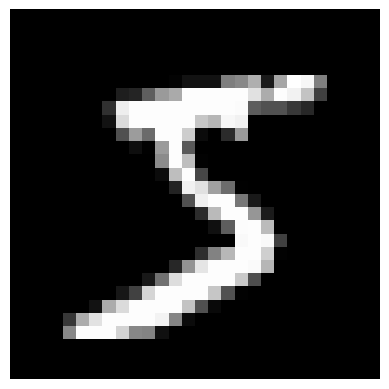

In [ ]:
import matplotlib.pyplot as plt
X2 = x_train[0,:]
plt.imshow(X2.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show()

### Normalize the pixel

In [ ]:
x_train_norm, x_test_norm = x_train/255.0, x_test/255.0

### Setup the framework of the training model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Setup the optimizer, loss function and performance metrics

In [ ]:
model.compile(optimizer='adam',
       loss='sparse_categorical_crossentropy',
       metrics=['accuracy']
)

### Perform model training

In [ ]:
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 12s 4ms/step - loss: 0.3242 - accuracy: 0.9070 - val_loss: 0.1590 - val_accuracy: 0.9533
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1548 - accuracy: 0.9544 - val_loss: 0.1167 - val_accuracy: 0.9656
Epoch 3/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1153 - accuracy: 0.9656 - val_loss: 0.0959 - val_accuracy: 0.9738
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0936 - accuracy: 0.9712 - val_loss: 0.0891 - val_accuracy: 0.9750
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0800 - accuracy: 0.9753 - val_loss: 0.0835 - val_accuracy: 0.9755


### Plot the performance curve (accuracy)

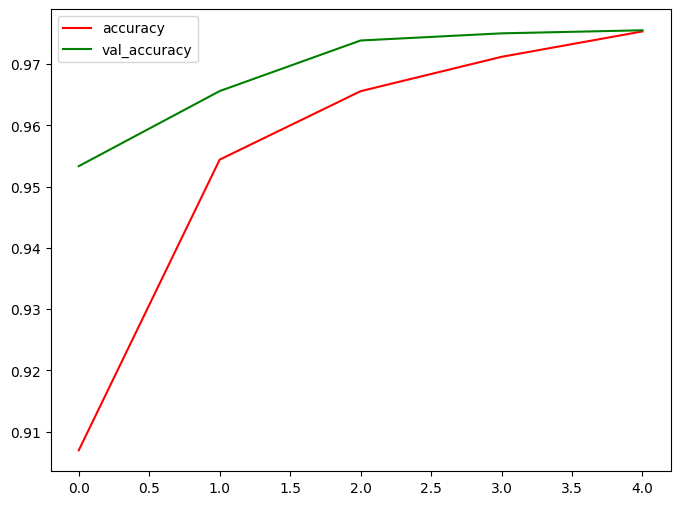

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'],'r',label='accuracy')
plt.plot(history.history['val_accuracy'],'g',label='val_accuracy')
plt.legend()

### Plot the performance curve (loss)

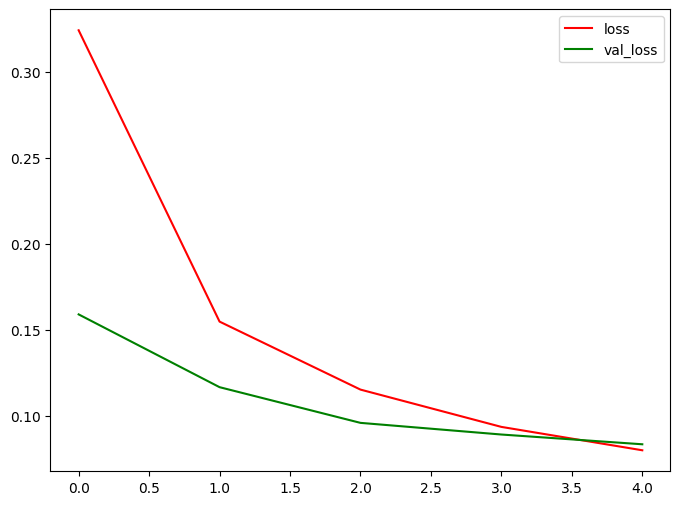

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'],'r',label='loss')
plt.plot(history.history['val_loss'],'g',label='val_loss')
plt.legend()

### Scoring the trained model

In [ ]:
score = model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
  print(f'{model.metrics_names[i]}:{score[i]:.4f}')

loss:0.0786
accuracy:0.9762


### Perform the prediction

In [ ]:
import numpy as np
predictions = np.argmax(model.predict(x_test_norm), axis=1)
print('actual: ', y_test[0:20])
print('prediction: ', predictions[0:20])

313/313 [==============================] - 1s 2ms/step
actual:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
prediction:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


### Compute the Prediction Probability of 0 to 9 for the test data

In [ ]:
predictions = model.predict(x_test_norm[8:9])
print(np.around(predictions[0],2))

1/1 [==============================] - 0s 23ms/step
[0.  0.  0.  0.  0.  0.7 0.3 0.  0.  0. ]


### Save the trained model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/model.h5')

### Use the trained model

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/model.h5')